In [ ]:
#IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#IMPORTING THE DATASET
dataset = pd.read_excel('input_male.xlsx')

In [ ]:
print(dataset)

    Caterory  Ferritin    FSH     LH  Testosterone    MDA    PC
0          1      1598   2.69   0.56          1.71  10.13  1.69
1          1      1436   5.29   0.64          2.18   8.50  1.44
2          1      3672   1.32   1.17          1.46  11.09  2.08
3          1      3013   0.77   1.19          1.56  13.66  2.06
4          1      4934   0.14   0.52          1.52  15.77  2.65
5          1      5320   0.10   0.10          0.49  16.86  2.11
6          1      3546   1.67   0.51          0.25  15.32  2.43
7          1      3305   0.26   1.01          1.61  12.92  2.35
8          1      6318   0.39   0.08          0.45  17.55  2.62
9          1      4420   0.34   1.95          2.43  12.41  2.43
10         1      1744   4.55   1.26          2.76   9.70  2.28
11         1      3832   4.72   1.25          1.73  11.10  2.01
12         1      2435   1.75   1.09          3.29  11.69  1.61
13         1      4832   1.46   0.48          0.23  15.13  2.08
14         1      3740   1.18   1.12    

In [ ]:
#VALIDATION DATASET
dataset_validation=dataset.sample(frac=0.2, random_state=10)

In [ ]:
print(dataset_validation)

    Caterory  Ferritin   FSH     LH  Testosterone    MDA    PC
37         2       121  2.80   8.50          3.08   2.12  0.80
23         1      3439  0.94   0.79          3.87  13.97  2.28
44         2       140  7.90   9.90          5.31   2.44  0.86
42         2        39  7.80  12.60         12.38   1.99  0.87
47         2        37  7.30   5.10          8.37   1.86  0.88
20         1      1684  1.46   0.98          4.64  10.51  1.57
3          1      3013  0.77   1.19          1.56  13.66  2.06
30         2        26  5.18   7.25          3.95   3.28  0.78
7          1      3305  0.26   1.01          1.61  12.92  2.35
6          1      3546  1.67   0.51          0.25  15.32  2.43


In [ ]:
X = dataset_validation.iloc[:,1:7].values
y = dataset_validation.iloc[:, -1].values

In [ ]:
print(X)

[[1.210e+02 2.800e+00 8.500e+00 3.080e+00 2.120e+00 8.000e-01]
 [3.439e+03 9.400e-01 7.900e-01 3.870e+00 1.397e+01 2.280e+00]
 [1.400e+02 7.900e+00 9.900e+00 5.310e+00 2.440e+00 8.600e-01]
 [3.900e+01 7.800e+00 1.260e+01 1.238e+01 1.990e+00 8.700e-01]
 [3.700e+01 7.300e+00 5.100e+00 8.370e+00 1.860e+00 8.800e-01]
 [1.684e+03 1.460e+00 9.800e-01 4.640e+00 1.051e+01 1.570e+00]
 [3.013e+03 7.700e-01 1.190e+00 1.560e+00 1.366e+01 2.060e+00]
 [2.600e+01 5.180e+00 7.250e+00 3.950e+00 3.280e+00 7.800e-01]
 [3.305e+03 2.600e-01 1.010e+00 1.610e+00 1.292e+01 2.350e+00]
 [3.546e+03 1.670e+00 5.100e-01 2.500e-01 1.532e+01 2.430e+00]]


In [ ]:
print(y)

[0.8  2.28 0.86 0.87 0.88 1.57 2.06 0.78 2.35 2.43]


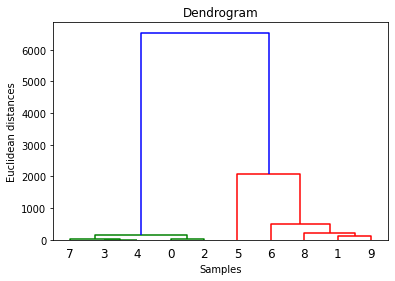

In [ ]:
## Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
## Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [ ]:
print(y_hc)

[1 0 1 1 1 2 3 1 0 0]


In [ ]:
#COUNTING THE NUMBER OF PATIENTS WITH NO DISEASE
no_disease=0
for i in y_hc:
    if i==2:
        no_disease+=1
print(no_disease)

1


In [ ]:
#COUNTING THE NUMBER OF PATIENTS IN EACH SEVERITY LEVEL OF HAVING DISEASE
dis_severity=[]
cluster_0=0
cluster_1=0
cluster_3=0
for i in y_hc:
    if i!=2:
        if i==0:
            cluster_0+=1
        elif i==1:
            cluster_1+=1
        else:
            cluster_3+=1
print("Cluster 1:",cluster_1)
print("Cluster 3:",cluster_3)
print("Cluster 2:",no_disease)
print("Cluster 0:",cluster_0)

Cluster 1: 5
Cluster 3: 1
Cluster 2: 1
Cluster 0: 3


In [ ]:
#CLUSTER 1: NO DISEASE
#CLUSTER 0: MILD DISEASE
#CLUSTER 2:MODERATE DISEASE
#CLUSTER 3:SEVERE DISEASE

In [ ]:
#APPENDING THE CLUSTER LABELS TO THE ORIGINAL DATA
dataset_validation = dataset_validation.copy()
dataset_validation['Cluster'] = y_hc
display(dataset_validation.sort_values(by='Cluster'))

,Caterory,Ferritin,FSH,LH,Testosterone,MDA,PC,Cluster
23,1,3439,0.94,0.79,3.87,13.97,2.28,0
7,1,3305,0.26,1.01,1.61,12.92,2.35,0
6,1,3546,1.67,0.51,0.25,15.32,2.43,0
37,2,121,2.80,8.50,3.08,2.12,0.80,1
44,2,140,7.90,9.90,5.31,2.44,0.86,1
42,2,39,7.80,12.60,12.38,1.99,0.87,1
47,2,37,7.30,5.10,8.37,1.86,0.88,1
30,2,26,5.18,7.25,3.95,3.28,0.78,1
20,1,1684,1.46,0.98,4.64,10.51,1.57,2
3,1,3013,0.77,1.19,1.56,13.66,2.06,3


In [ ]:
#CLASSIFICATION

In [ ]:
X2 = dataset_validation.iloc[:,1:7].values
y2 = dataset_validation.iloc[:, -1].values

In [ ]:
print(X2)

[[1.210e+02 2.800e+00 8.500e+00 3.080e+00 2.120e+00 8.000e-01]
 [3.439e+03 9.400e-01 7.900e-01 3.870e+00 1.397e+01 2.280e+00]
 [1.400e+02 7.900e+00 9.900e+00 5.310e+00 2.440e+00 8.600e-01]
 [3.900e+01 7.800e+00 1.260e+01 1.238e+01 1.990e+00 8.700e-01]
 [3.700e+01 7.300e+00 5.100e+00 8.370e+00 1.860e+00 8.800e-01]
 [1.684e+03 1.460e+00 9.800e-01 4.640e+00 1.051e+01 1.570e+00]
 [3.013e+03 7.700e-01 1.190e+00 1.560e+00 1.366e+01 2.060e+00]
 [2.600e+01 5.180e+00 7.250e+00 3.950e+00 3.280e+00 7.800e-01]
 [3.305e+03 2.600e-01 1.010e+00 1.610e+00 1.292e+01 2.350e+00]
 [3.546e+03 1.670e+00 5.100e-01 2.500e-01 1.532e+01 2.430e+00]]


In [ ]:
print(y2)

[1 0 1 1 1 2 3 1 0 0]


In [ ]:
#SPLITTING THE DATASET INTO TRAINING SET AND TEST SET
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)

In [ ]:
print(X2_test)

[[1.400e+02 7.900e+00 9.900e+00 5.310e+00 2.440e+00 8.600e-01]
 [3.305e+03 2.600e-01 1.010e+00 1.610e+00 1.292e+01 2.350e+00]]


In [ ]:
#FEATURE SELECTION
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)

In [ ]:
#KNN

In [ ]:
#TRAINING KNN MODEL ON THE TRAINING SET
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X2_train, y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#PREDICTING THE TEST SET RESULTS
y_pred = classifier.predict(X2_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y2_test.reshape(len(y2_test),1)),1))

[[1 1]
 [0 0]]


In [ ]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X2_test)
cm1 = confusion_matrix(y2_test, y_pred)
print(cm1)
accuracy_score(y2_test, y_pred)

[[1 0]
 [0 1]]


1.0

In [ ]:
sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity )

Sensitivity :  1.0


In [ ]:
#PREDICTING A NEW RESULT
print(classifier.predict(sc.transform([[4832,1.46,0.48,0.23,15.13,2.08]])))

[0]


In [ ]:
##SVM

In [ ]:
#SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X2_train, y2_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#PREDICTING THE TEST SET RESULTS
y_pred = classifier2.predict(X2_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y2_test.reshape(len(y2_test),1)),1))

[[1 1]
 [0 0]]


In [ ]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier2.predict(X2_test)
cm = confusion_matrix(y2_test, y_pred)
print(cm)
accuracy_score(y2_test, y_pred)

[[1 0]
 [0 1]]


1.0

In [ ]:
#PREDICTING A NEW RESULT
print(classifier.predict(sc.transform([[4832,1.46,0.48,0.23,15.13,2.08]])))

[0]


In [ ]:
##NAIVE BAYES

In [ ]:
#NAIVE BAYES CLASSIFICATION
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit(X2_train, y2_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#PREDICTING THE TEST SET RESULTS
y_pred = classifier3.predict(X2_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y2_test.reshape(len(y2_test),1)),1))

[[1 1]
 [0 0]]


In [ ]:
#CONFUSION MATRIX AND ACCURACY
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier3.predict(X2_test)
cm = confusion_matrix(y2_test, y_pred)
print(cm)
accuracy_score(y2_test, y_pred)

[[1 0]
 [0 1]]


1.0

In [ ]:
#PREDICTING A NEW RESULT
print(classifier.predict(sc.transform([[4832,1.46,0.48,0.23,15.13,2.08]])))

[0]
